In [32]:
import mediapipe as mp
import numpy as np
import pandas as pd 
import cv2 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

In [2]:
mp_drawing=mp.solutions.drawing_utils
mp_pose=mp.solutions.pose

In [3]:
import os

In [4]:
directory="C:\\Users\\ASUS\\Desktop\\Project work\\major project\\new Model Work\\videos\\Adhomukhasvanasana"
directory2="C:\\Users\\ASUS\\Desktop\\Project work\\major project\\new Model Work\\videos\\UtkataKonasana"
directory3="C:\\Users\\ASUS\\Desktop\\Project work\\major project\\new Model Work\\videos\\Utkatasana"
directory4="C:\\Users\\ASUS\\Desktop\\Project work\\major project\\new Model Work\\videos\\Virabhadrasana"

In [5]:
filepaths=[]
for filename in os.listdir(directory):
    f = os.path.join(directory,filename)
    filepaths.append(f)
    
    
for filename in os.listdir(directory2):
    f = os.path.join(directory2,filename)
    filepaths.append(f)

for filename in os.listdir(directory3):
    f = os.path.join(directory3,filename)
    filepaths.append(f)
    
for filename in os.listdir(directory4):
    f = os.path.join(directory4,filename)
    filepaths.append(f)
    
print(len(filepaths)) 



22923


In [6]:
print(filepaths[4000]+" "+filepaths[9000]+" "+filepaths[14000]+" "+filepaths[22000])
columns=[]
for lndmrk in mp_pose.PoseLandmark:
    val=str(lndmrk).split(".")[1]
    columns.append(val+"_x")
    columns.append(val+"_y")
    columns.append(val+"_z")
    columns.append(val+"_visiblity")
columns.append("target")

C:\Users\ASUS\Desktop\Project work\major project\new Model Work\videos\Adhomukhasvanasana\Adhomukhasvanasana 487.jpg C:\Users\ASUS\Desktop\Project work\major project\new Model Work\videos\UtkataKonasana\Utkatakonasana 0 (4979).jpg C:\Users\ASUS\Desktop\Project work\major project\new Model Work\videos\Utkatasana\Utkatasana (400).jpg C:\Users\ASUS\Desktop\Project work\major project\new Model Work\videos\Virabhadrasana\Virabhadrasana (7038).jpg


In [7]:
data=[]


In [8]:
#functions
def collect_data(landmarks,data,target):
    curr=[]
    for i in mp_pose.PoseLandmark:
        val=i.value
        curr.append(landmarks[val].x)
        curr.append(landmarks[val].y)
        curr.append(landmarks[val].z)
        curr.append(landmarks[val].visibility)
    
    curr.append(target)
    data.append(curr)
    
    
def extract_target(path):
    return path.split("\\")[-1].split(" ")[0]


def extract_datapoints(path):
    
## Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.7, min_tracking_confidence=0.7) as pose:
        
        frame = cv2.imread(path)
            # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

            # Make detection
        results = pose.process(image)

            # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            target=extract_target(path)
            collect_data(landmarks,data,target)


        except:
            print("Error")
            pass


            # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                     )               

            

            

    
    cv2.destroyAllWindows()

In [9]:
len(filepaths)
# 16001

22923

In [10]:
from tqdm import tqdm
for i in tqdm(filepaths[16001:]):
    if(i.split(".")[1]=="jpg"):
        
#         print(i)
        extract_datapoints(i)

  6%|████▌                                                                          | 401/6922 [02:21<37:14,  2.92it/s]

Error


  8%|██████▎                                                                        | 553/6922 [03:18<30:20,  3.50it/s]

Error


  8%|██████▎                                                                        | 554/6922 [03:19<29:52,  3.55it/s]

Error


  8%|██████▎                                                                        | 555/6922 [03:19<28:27,  3.73it/s]

Error


  8%|██████▎                                                                        | 556/6922 [03:19<28:02,  3.78it/s]

Error


  8%|██████▎                                                                        | 557/6922 [03:20<27:51,  3.81it/s]

Error


  8%|██████▍                                                                        | 559/6922 [03:20<28:47,  3.68it/s]

Error


  8%|██████▍                                                                        | 560/6922 [03:20<27:34,  3.85it/s]

Error


  8%|██████▍                                                                        | 561/6922 [03:21<27:59,  3.79it/s]

Error


  8%|██████▍                                                                        | 562/6922 [03:21<27:29,  3.86it/s]

Error


  8%|██████▍                                                                        | 563/6922 [03:21<28:31,  3.71it/s]

Error


  8%|██████▍                                                                        | 564/6922 [03:21<28:50,  3.67it/s]

Error


 13%|██████████▌                                                                    | 925/6922 [05:14<29:31,  3.38it/s]

Error


 13%|██████████▌                                                                    | 926/6922 [05:15<30:16,  3.30it/s]

Error


 22%|█████████████████▍                                                            | 1547/6922 [08:52<27:26,  3.26it/s]

Error


 23%|█████████████████▌                                                            | 1558/6922 [08:56<28:33,  3.13it/s]

Error


 25%|███████████████████▊                                                          | 1758/6922 [10:05<29:01,  2.97it/s]

Error


 26%|███████████████████▉                                                          | 1769/6922 [10:08<27:34,  3.11it/s]

Error


 26%|████████████████████                                                          | 1780/6922 [10:12<28:12,  3.04it/s]

Error


 26%|████████████████████▏                                                         | 1791/6922 [10:16<28:05,  3.05it/s]

Error


 26%|████████████████████▎                                                         | 1802/6922 [10:20<28:25,  3.00it/s]

Error


 26%|████████████████████▍                                                         | 1813/6922 [10:23<26:49,  3.17it/s]

Error


 26%|████████████████████▌                                                         | 1824/6922 [10:27<27:13,  3.12it/s]

Error


 27%|████████████████████▋                                                         | 1835/6922 [10:31<27:14,  3.11it/s]

Error


 27%|████████████████████▊                                                         | 1847/6922 [10:35<27:06,  3.12it/s]

Error


 27%|████████████████████▉                                                         | 1858/6922 [10:38<26:59,  3.13it/s]

Error


 42%|████████████████████████████████▋                                             | 2902/6922 [16:47<21:58,  3.05it/s]

Error


 42%|█████████████████████████████████                                             | 2935/6922 [16:59<23:08,  2.87it/s]

Error


 43%|█████████████████████████████████▏                                            | 2946/6922 [17:03<23:21,  2.84it/s]

Error


 43%|█████████████████████████████████▎                                            | 2958/6922 [17:07<21:56,  3.01it/s]

Error


 43%|█████████████████████████████████▌                                            | 2980/6922 [17:15<22:08,  2.97it/s]

Error


 43%|█████████████████████████████████▋                                            | 2991/6922 [17:19<22:52,  2.86it/s]

Error


 47%|████████████████████████████████████▊                                         | 3268/6922 [19:00<21:51,  2.79it/s]

Error


 57%|████████████████████████████████████████████▎                                 | 3935/6922 [23:06<17:46,  2.80it/s]

Error


 57%|████████████████████████████████████████████▋                                 | 3969/6922 [23:18<16:45,  2.94it/s]

Error


 57%|████████████████████████████████████████████▊                                 | 3980/6922 [23:22<17:57,  2.73it/s]

Error


 58%|█████████████████████████████████████████████                                 | 4002/6922 [23:30<17:25,  2.79it/s]

Error


 58%|█████████████████████████████████████████████▏                                | 4013/6922 [23:35<17:30,  2.77it/s]

Error


 58%|█████████████████████████████████████████████▎                                | 4024/6922 [23:39<16:51,  2.86it/s]

Error


 62%|████████████████████████████████████████████████▍                             | 4302/6922 [25:26<15:27,  2.83it/s]

Error


 62%|████████████████████████████████████████████████▌                             | 4313/6922 [25:30<16:48,  2.59it/s]

Error


 62%|████████████████████████████████████████████████▋                             | 4324/6922 [25:34<15:35,  2.78it/s]

Error


 63%|████████████████████████████████████████████████▊                             | 4335/6922 [25:38<15:22,  2.80it/s]

Error


 63%|████████████████████████████████████████████████▉                             | 4346/6922 [25:42<15:25,  2.78it/s]

Error


 63%|█████████████████████████████████████████████████                             | 4357/6922 [25:47<15:25,  2.77it/s]

Error


 63%|█████████████████████████████████████████████████▏                            | 4368/6922 [25:51<15:26,  2.76it/s]

Error


 63%|█████████████████████████████████████████████████▎                            | 4379/6922 [25:55<15:48,  2.68it/s]

Error


 63%|█████████████████████████████████████████████████▍                            | 4390/6922 [25:59<15:12,  2.78it/s]

Error


 64%|█████████████████████████████████████████████████▌                            | 4402/6922 [26:03<14:53,  2.82it/s]

Error


 64%|█████████████████████████████████████████████████▋                            | 4413/6922 [26:07<15:03,  2.78it/s]

Error


 64%|█████████████████████████████████████████████████▉                            | 4435/6922 [26:16<14:37,  2.84it/s]

Error


 64%|██████████████████████████████████████████████████                            | 4446/6922 [26:20<15:11,  2.72it/s]

Error


 64%|██████████████████████████████████████████████████▏                           | 4457/6922 [26:24<14:44,  2.79it/s]

Error


 65%|██████████████████████████████████████████████████▎                           | 4468/6922 [26:28<14:12,  2.88it/s]

Error


 65%|██████████████████████████████████████████████████▍                           | 4479/6922 [26:32<14:44,  2.76it/s]

Error


 74%|█████████████████████████████████████████████████████████▋                    | 5124/6922 [30:39<11:05,  2.70it/s]

Error


 74%|█████████████████████████████████████████████████████████▊                    | 5135/6922 [30:43<10:46,  2.76it/s]

Error


 74%|█████████████████████████████████████████████████████████▉                    | 5146/6922 [30:47<10:54,  2.71it/s]

Error


 75%|██████████████████████████████████████████████████████████                    | 5157/6922 [30:51<10:43,  2.74it/s]

Error


 75%|██████████████████████████████████████████████████████████▏                   | 5168/6922 [30:56<10:52,  2.69it/s]

Error


 75%|██████████████████████████████████████████████████████████▎                   | 5180/6922 [31:00<10:37,  2.73it/s]

Error


 75%|██████████████████████████████████████████████████████████▍                   | 5191/6922 [31:04<10:41,  2.70it/s]

Error


 75%|██████████████████████████████████████████████████████████▌                   | 5202/6922 [31:08<10:13,  2.80it/s]

Error


 75%|██████████████████████████████████████████████████████████▋                   | 5213/6922 [31:13<10:33,  2.70it/s]

Error


 75%|██████████████████████████████████████████████████████████▊                   | 5224/6922 [31:17<10:28,  2.70it/s]

Error


 76%|██████████████████████████████████████████████████████████▉                   | 5235/6922 [31:21<10:01,  2.80it/s]

Error


 76%|███████████████████████████████████████████████████████████                   | 5246/6922 [31:25<10:15,  2.72it/s]

Error


 76%|███████████████████████████████████████████████████████████▏                  | 5257/6922 [31:30<10:06,  2.74it/s]

Error


 76%|███████████████████████████████████████████████████████████▎                  | 5268/6922 [31:34<10:07,  2.72it/s]

Error


 76%|███████████████████████████████████████████████████████████▍                  | 5279/6922 [31:38<09:57,  2.75it/s]

Error


 76%|███████████████████████████████████████████████████████████▌                  | 5291/6922 [31:42<09:56,  2.73it/s]

Error


 77%|███████████████████████████████████████████████████████████▋                  | 5302/6922 [31:47<10:02,  2.69it/s]

Error


 77%|███████████████████████████████████████████████████████████▊                  | 5313/6922 [31:51<09:39,  2.78it/s]

Error


 77%|███████████████████████████████████████████████████████████▉                  | 5324/6922 [31:55<09:41,  2.75it/s]

Error


 77%|████████████████████████████████████████████████████████████                  | 5335/6922 [31:59<09:52,  2.68it/s]

Error


 77%|████████████████████████████████████████████████████████████▏                 | 5346/6922 [32:03<09:18,  2.82it/s]

Error


 77%|████████████████████████████████████████████████████████████▎                 | 5357/6922 [32:07<09:11,  2.84it/s]

Error


 78%|████████████████████████████████████████████████████████████▍                 | 5368/6922 [32:11<09:05,  2.85it/s]

Error


 78%|████████████████████████████████████████████████████████████▌                 | 5379/6922 [32:15<08:50,  2.91it/s]

Error


 78%|████████████████████████████████████████████████████████████▋                 | 5390/6922 [32:20<09:30,  2.69it/s]

Error


 78%|████████████████████████████████████████████████████████████▊                 | 5402/6922 [32:24<09:36,  2.64it/s]

Error


 78%|████████████████████████████████████████████████████████████▉                 | 5413/6922 [32:28<09:14,  2.72it/s]

Error


 78%|█████████████████████████████████████████████████████████████                 | 5424/6922 [32:33<08:59,  2.78it/s]

Error


 79%|█████████████████████████████████████████████████████████████▏                | 5435/6922 [32:37<09:10,  2.70it/s]

Error


 79%|█████████████████████████████████████████████████████████████▎                | 5446/6922 [32:41<09:06,  2.70it/s]

Error


 79%|█████████████████████████████████████████████████████████████▍                | 5457/6922 [32:45<08:46,  2.78it/s]

Error


 79%|█████████████████████████████████████████████████████████████▌                | 5468/6922 [32:49<08:46,  2.76it/s]

Error


 79%|█████████████████████████████████████████████████████████████▋                | 5479/6922 [32:53<08:46,  2.74it/s]

Error


 80%|██████████████████████████████████████████████████████████████                | 5513/6922 [33:06<08:51,  2.65it/s]

Error


 80%|██████████████████████████████████████████████████████████████▏               | 5524/6922 [33:11<08:30,  2.74it/s]

Error


 80%|██████████████████████████████████████████████████████████████▎               | 5535/6922 [33:15<08:18,  2.78it/s]

Error


 96%|███████████████████████████████████████████████████████████████████████████   | 6664/6922 [40:33<01:34,  2.74it/s]

Error


 96%|███████████████████████████████████████████████████████████████████████████   | 6665/6922 [40:33<01:30,  2.83it/s]

Error


 96%|███████████████████████████████████████████████████████████████████████████▏  | 6667/6922 [40:34<01:30,  2.82it/s]

Error


 96%|███████████████████████████████████████████████████████████████████████████▏  | 6668/6922 [40:34<01:26,  2.92it/s]

Error


 96%|███████████████████████████████████████████████████████████████████████████▏  | 6669/6922 [40:34<01:24,  3.01it/s]

Error


 96%|███████████████████████████████████████████████████████████████████████████▏  | 6670/6922 [40:35<01:26,  2.90it/s]

Error


 96%|███████████████████████████████████████████████████████████████████████████▏  | 6671/6922 [40:35<01:23,  3.01it/s]

Error


 96%|███████████████████████████████████████████████████████████████████████████▏  | 6672/6922 [40:35<01:25,  2.94it/s]

Error


 96%|███████████████████████████████████████████████████████████████████████████▏  | 6673/6922 [40:36<01:25,  2.91it/s]

Error


 96%|███████████████████████████████████████████████████████████████████████████▏  | 6674/6922 [40:36<01:23,  2.96it/s]

Error


 96%|███████████████████████████████████████████████████████████████████████████▏  | 6675/6922 [40:36<01:19,  3.10it/s]

Error


 96%|███████████████████████████████████████████████████████████████████████████▏  | 6676/6922 [40:37<01:19,  3.09it/s]

Error


 96%|███████████████████████████████████████████████████████████████████████████▎  | 6678/6922 [40:37<01:23,  2.93it/s]

Error


 96%|███████████████████████████████████████████████████████████████████████████▎  | 6679/6922 [40:38<01:22,  2.96it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▎  | 6680/6922 [40:38<01:21,  2.98it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▎  | 6681/6922 [40:38<01:19,  3.04it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▎  | 6682/6922 [40:39<01:17,  3.10it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▎  | 6683/6922 [40:39<01:18,  3.05it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▎  | 6684/6922 [40:39<01:18,  3.02it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▎  | 6685/6922 [40:40<01:18,  3.03it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▎  | 6686/6922 [40:40<01:21,  2.91it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▎  | 6687/6922 [40:40<01:17,  3.02it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▎  | 6689/6922 [40:41<01:21,  2.87it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▍  | 6690/6922 [40:42<01:22,  2.82it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▍  | 6691/6922 [40:42<01:20,  2.88it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▍  | 6692/6922 [40:42<01:18,  2.94it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▍  | 6693/6922 [40:42<01:17,  2.96it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▍  | 6694/6922 [40:43<01:17,  2.93it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▍  | 6695/6922 [40:43<01:16,  2.95it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▍  | 6696/6922 [40:44<01:16,  2.95it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▍  | 6697/6922 [40:44<01:16,  2.95it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▍  | 6698/6922 [40:44<01:15,  2.98it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▌  | 6701/6922 [40:45<01:18,  2.83it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▌  | 6702/6922 [40:46<01:17,  2.83it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▌  | 6703/6922 [40:46<01:17,  2.83it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▌  | 6704/6922 [40:46<01:15,  2.89it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▌  | 6705/6922 [40:47<01:15,  2.86it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▌  | 6706/6922 [40:47<01:15,  2.86it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▌  | 6707/6922 [40:47<01:12,  2.96it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▌  | 6708/6922 [40:48<01:11,  3.00it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▌  | 6709/6922 [40:48<01:09,  3.08it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▌  | 6710/6922 [40:48<01:07,  3.14it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▋  | 6712/6922 [40:49<01:11,  2.93it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▋  | 6713/6922 [40:49<01:09,  3.02it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▋  | 6714/6922 [40:50<01:09,  2.98it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▋  | 6715/6922 [40:50<01:09,  2.99it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▋  | 6716/6922 [40:50<01:07,  3.07it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▋  | 6717/6922 [40:51<01:06,  3.06it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▋  | 6718/6922 [40:51<01:08,  3.00it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▋  | 6719/6922 [40:51<01:07,  3.02it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▋  | 6720/6922 [40:52<01:07,  3.01it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▋  | 6721/6922 [40:52<01:05,  3.05it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▊  | 6723/6922 [40:53<01:06,  3.00it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▊  | 6724/6922 [40:53<01:06,  2.99it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▊  | 6725/6922 [40:53<01:05,  3.02it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▊  | 6726/6922 [40:54<01:04,  3.04it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▊  | 6727/6922 [40:54<01:04,  3.05it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▊  | 6728/6922 [40:54<01:05,  2.97it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▉  | 6742/6922 [41:00<01:09,  2.60it/s]

Error


 97%|███████████████████████████████████████████████████████████████████████████▉  | 6743/6922 [41:00<01:05,  2.72it/s]

Error


 97%|████████████████████████████████████████████████████████████████████████████  | 6745/6922 [41:01<01:03,  2.79it/s]

Error


 97%|████████████████████████████████████████████████████████████████████████████  | 6746/6922 [41:01<01:01,  2.87it/s]

Error


 97%|████████████████████████████████████████████████████████████████████████████  | 6747/6922 [41:01<00:59,  2.96it/s]

Error


 97%|████████████████████████████████████████████████████████████████████████████  | 6748/6922 [41:02<00:59,  2.94it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████  | 6749/6922 [41:02<00:58,  2.97it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████  | 6750/6922 [41:02<00:57,  3.01it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████  | 6751/6922 [41:03<00:57,  2.98it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████  | 6752/6922 [41:03<00:56,  2.99it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████  | 6753/6922 [41:03<00:54,  3.10it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████  | 6754/6922 [41:04<00:53,  3.16it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▏ | 6756/6922 [41:04<00:55,  3.01it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▏ | 6757/6922 [41:05<00:54,  3.01it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▏ | 6758/6922 [41:05<00:54,  3.01it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▏ | 6759/6922 [41:05<00:52,  3.08it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▏ | 6760/6922 [41:06<00:52,  3.11it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▏ | 6761/6922 [41:06<00:52,  3.07it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▏ | 6762/6922 [41:06<00:53,  2.99it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▏ | 6763/6922 [41:07<00:52,  3.02it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▏ | 6764/6922 [41:07<00:51,  3.07it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▏ | 6765/6922 [41:07<00:51,  3.03it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▎ | 6767/6922 [41:08<00:52,  2.95it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▎ | 6768/6922 [41:08<00:53,  2.89it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▎ | 6769/6922 [41:09<00:50,  3.03it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▎ | 6770/6922 [41:09<00:50,  3.00it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▎ | 6771/6922 [41:09<00:50,  3.02it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▎ | 6772/6922 [41:10<00:50,  2.95it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▎ | 6773/6922 [41:10<00:50,  2.98it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▎ | 6774/6922 [41:10<00:49,  2.96it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▎ | 6775/6922 [41:11<00:51,  2.87it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▎ | 6776/6922 [41:11<00:49,  2.97it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▍ | 6779/6922 [41:12<00:53,  2.68it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▍ | 6780/6922 [41:13<00:51,  2.76it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▍ | 6781/6922 [41:13<00:48,  2.90it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▍ | 6783/6922 [41:14<00:49,  2.83it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▍ | 6787/6922 [41:15<00:51,  2.61it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▌ | 6789/6922 [41:16<00:51,  2.59it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▌ | 6790/6922 [41:16<00:50,  2.61it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▌ | 6798/6922 [41:19<00:45,  2.74it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▋ | 6800/6922 [41:20<00:42,  2.85it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▋ | 6801/6922 [41:20<00:42,  2.84it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▋ | 6802/6922 [41:21<00:42,  2.83it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▋ | 6803/6922 [41:21<00:41,  2.88it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▋ | 6804/6922 [41:21<00:40,  2.94it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▋ | 6805/6922 [41:22<00:38,  3.02it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▋ | 6806/6922 [41:22<00:38,  2.98it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▋ | 6807/6922 [41:22<00:37,  3.08it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▋ | 6808/6922 [41:23<00:37,  3.00it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▋ | 6809/6922 [41:23<00:38,  2.96it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▊ | 6812/6922 [41:24<00:38,  2.83it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▊ | 6814/6922 [41:25<00:38,  2.83it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▊ | 6815/6922 [41:25<00:36,  2.90it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▊ | 6816/6922 [41:26<00:35,  2.98it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▊ | 6817/6922 [41:26<00:35,  2.93it/s]

Error


 98%|████████████████████████████████████████████████████████████████████████████▊ | 6818/6922 [41:26<00:34,  3.02it/s]

Error


 99%|████████████████████████████████████████████████████████████████████████████▊ | 6820/6922 [41:27<00:36,  2.81it/s]

Error


 99%|████████████████████████████████████████████████████████████████████████████▊ | 6821/6922 [41:27<00:34,  2.97it/s]

Error


 99%|████████████████████████████████████████████████████████████████████████████▉ | 6824/6922 [41:28<00:36,  2.71it/s]

Error


 99%|████████████████████████████████████████████████████████████████████████████▉ | 6825/6922 [41:29<00:37,  2.59it/s]

Error


 99%|████████████████████████████████████████████████████████████████████████████▉ | 6826/6922 [41:29<00:37,  2.57it/s]

Error


 99%|████████████████████████████████████████████████████████████████████████████▉ | 6828/6922 [41:30<00:34,  2.74it/s]

Error


 99%|████████████████████████████████████████████████████████████████████████████▉ | 6829/6922 [41:30<00:33,  2.79it/s]

Error


 99%|████████████████████████████████████████████████████████████████████████████▉ | 6830/6922 [41:31<00:34,  2.66it/s]

Error


 99%|████████████████████████████████████████████████████████████████████████████▉ | 6831/6922 [41:31<00:32,  2.79it/s]

Error


 99%|████████████████████████████████████████████████████████████████████████████▉ | 6832/6922 [41:31<00:31,  2.82it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████ | 6835/6922 [41:33<00:32,  2.65it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████ | 6836/6922 [41:33<00:32,  2.64it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████ | 6840/6922 [41:35<00:31,  2.63it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████ | 6841/6922 [41:35<00:31,  2.54it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████ | 6843/6922 [41:36<00:28,  2.73it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▏| 6845/6922 [41:36<00:28,  2.75it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▏| 6846/6922 [41:37<00:27,  2.78it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▏| 6847/6922 [41:37<00:26,  2.87it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▏| 6848/6922 [41:37<00:26,  2.84it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▏| 6849/6922 [41:38<00:25,  2.81it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▏| 6850/6922 [41:38<00:25,  2.78it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▏| 6851/6922 [41:39<00:25,  2.79it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▏| 6852/6922 [41:39<00:24,  2.84it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▏| 6853/6922 [41:39<00:23,  2.88it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▏| 6854/6922 [41:40<00:23,  2.94it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▎| 6856/6922 [41:40<00:23,  2.87it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▎| 6857/6922 [41:41<00:22,  2.87it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▎| 6858/6922 [41:41<00:21,  2.96it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▎| 6859/6922 [41:41<00:21,  2.90it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▎| 6860/6922 [41:42<00:20,  2.97it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▎| 6861/6922 [41:42<00:20,  3.00it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▎| 6862/6922 [41:42<00:20,  2.98it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▎| 6864/6922 [41:43<00:20,  2.80it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▎| 6865/6922 [41:43<00:20,  2.84it/s]

Error


 99%|█████████████████████████████████████████████████████████████████████████████▍| 6867/6922 [41:44<00:19,  2.89it/s]

Error


100%|██████████████████████████████████████████████████████████████████████████████| 6922/6922 [42:05<00:00,  2.74it/s]


In [11]:
len(data)

6680

In [12]:
df=pd.DataFrame(data=data,columns=columns)

In [13]:
df.to_csv("additionaldata2.csv")



In [83]:
#Next time create dataset and csv and at last merge all csv into one and shuffle the dataset
#Done till 30 videos

In [14]:

df1=pd.read_csv("additionaldata.csv")


In [35]:
df1.info()
df1=df1.append(df)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21780 entries, 0 to 21779
Columns: 133 entries, NOSE_x to target
dtypes: float64(132), object(1)
memory usage: 22.1+ MB


KeyboardInterrupt: 

In [17]:
df1 = df1.sample(frac=1).reset_index(drop=True)

In [18]:
df1.head(50)

,Unnamed: 0,NOSE_x,NOSE_y,NOSE_z,NOSE_visiblity,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_visiblity,LEFT_EYE_x,...,RIGHT_HEEL_visiblity,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_visiblity,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_visiblity,target
0,NaN,0.578448,0.298039,-0.317112,0.999999,0.578381,0.282798,-0.298318,0.999998,0.579210,...,0.968246,0.760104,0.783357,-0.077465,0.983457,0.322369,0.780748,-0.172348,0.994242,Virabhadrasana
1,NaN,0.359901,0.461018,-0.231700,0.999497,0.358821,0.447564,-0.210097,0.999693,0.358722,...,0.956003,0.477286,0.953005,-0.024563,0.989073,0.185604,0.875756,0.183238,0.982086,Virabhadrasana
2,3147.0,0.419541,0.249250,-0.155843,0.997396,0.411996,0.233838,-0.121864,0.996887,0.411841,...,0.849862,0.443583,0.884018,0.127326,0.421305,0.432150,0.890322,-0.217247,0.876923,Adhomukhasvanasana
3,7908.0,0.475262,0.286882,-0.688793,0.999953,0.485981,0.271818,-0.664184,0.999890,0.491492,...,0.948495,0.738753,0.933790,0.021645,0.993262,0.192034,0.939074,0.051685,0.993845,Utkatakonasana
4,10959.0,0.247435,0.193161,-0.536878,0.999965,0.233303,0.160199,-0.583995,0.999958,0.237158,...,0.415161,0.874289,0.551771,0.267591,0.979100,0.817789,0.503128,0.510651,0.633577,Utkatasana
5,8160.0,0.498662,0.321754,-0.731871,0.999964,0.506481,0.307300,-0.714694,0.999914,0.510917,...,0.950582,0.786235,0.920865,-0.014112,0.988027,0.160227,0.913358,0.044717,0.988304,Utkatakonasana
6,3784.0,0.610082,0.130429,-0.394544,0.999553,0.612240,0.113283,-0.360823,0.998947,0.614397,...,0.880889,0.612472,0.933699,0.315603,0.664486,0.612133,0.957887,-0.104822,0.945510,Adhomukhasvanasana
7,13602.0,0.436532,0.663153,-0.049324,0.996976,0.421991,0.666053,-0.074976,0.998014,0.420292,...,0.562301,0.692919,0.799473,-0.018318,0.976076,0.685614,0.785580,0.286900,0.614779,Utkatasana
8,10142.0,0.212298,0.420778,-0.285506,0.999941,0.207417,0.391636,-0.282805,0.999925,0.209579,...,0.786141,0.739807,0.811021,0.176983,0.977522,0.721384,0.771303,0.543152,0.751479,Utkatasana
9,5954.0,0.531751,0.195809,-0.443402,0.999994,0.540080,0.173124,-0.410314,0.999993,0.545188,...,0.417312,0.770749,1.071904,-0.379331,0.323833,0.238744,1.070316,-0.387674,0.255677,Utkatakonasana


In [20]:
# df1.to_csv("yoga_poses_dataset_trial.csv")
df1.drop("Unnamed: 0",axis=1,inplace=True)
df1.to_csv("yoga_poses_new_dataset.csv")

In [21]:
df=pd.read_csv("yoga_poses_new_dataset.csv")

In [22]:
import math

In [23]:
def calculate_angle(A,B):
    unit_A=A/np.linalg.norm(A)
    unit_B=B/np.linalg.norm(B)

    return np.arccos(np.dot(unit_A,unit_B))

print(calculate_angle([-48.5,0,-1],[-1,-8,0]))


def joint_angle(df):
    chest_vector=np.transpose(np.array([df['LEFT_SHOULDER_x']-df['RIGHT_SHOULDER_x'],df['LEFT_SHOULDER_y']-df['RIGHT_SHOULDER_y'],df['LEFT_SHOULDER_z']-df['RIGHT_SHOULDER_z']]))
    left_upper_arm_vector=np.transpose(np.array([df['LEFT_ELBOW_x']-df['LEFT_SHOULDER_x'],df['LEFT_ELBOW_y']-df['LEFT_SHOULDER_y'],df['LEFT_ELBOW_z']-df['LEFT_SHOULDER_z']]))
    right_upper_arm_vector=np.transpose(np.array([df['RIGHT_ELBOW_x']-df['RIGHT_SHOULDER_x'],df['RIGHT_ELBOW_y']-df['RIGHT_SHOULDER_y'],df['RIGHT_ELBOW_z']-df['RIGHT_SHOULDER_z']]))
    left_lower_arm_vector=np.transpose(np.array([df['LEFT_WRIST_x']-df['LEFT_ELBOW_x'],df['LEFT_WRIST_y']-df['LEFT_ELBOW_y'],df['LEFT_WRIST_z']-df['LEFT_ELBOW_z']]))
    right_lower_arm_vector=np.transpose(np.array([df['RIGHT_WRIST_x']-df['RIGHT_ELBOW_x'],df['RIGHT_WRIST_y']-df['RIGHT_ELBOW_y'],df['RIGHT_WRIST_z']-df['RIGHT_ELBOW_z']]))
    lowerbody_vector=np.transpose(np.array([df['LEFT_HIP_x']-df['RIGHT_HIP_x'],df['LEFT_HIP_y']-df['RIGHT_HIP_y'],df['LEFT_HIP_z']-df['RIGHT_HIP_z']]))
    left_upper_foot_vector=np.transpose(np.array([df['LEFT_KNEE_x']-df['LEFT_HIP_x'],df['LEFT_KNEE_y']-df['LEFT_HIP_y'],df['LEFT_KNEE_z']-df['LEFT_HIP_z']]))
    right_upper_foot_vector=np.transpose(np.array([df['RIGHT_KNEE_x']-df['RIGHT_HIP_x'],df['RIGHT_KNEE_y']-df['RIGHT_HIP_y'],df['RIGHT_KNEE_z']-df['RIGHT_HIP_z']]))
    left_lower_foot_vector=np.transpose(np.array([df['LEFT_ANKLE_x']-df['LEFT_KNEE_x'],df['LEFT_ANKLE_y']-df['LEFT_KNEE_y'],df['LEFT_ANKLE_z']-df['LEFT_KNEE_z']]))
    right_lower_foot_vector=np.transpose(np.array([df['RIGHT_ANKLE_x']-df['RIGHT_KNEE_x'],df['RIGHT_ANKLE_y']-df['RIGHT_KNEE_y'],df['RIGHT_ANKLE_z']-df['RIGHT_KNEE_z']]))
    mouth_vector=np.transpose(np.array([df['MOUTH_LEFT_x']-df['MOUTH_RIGHT_x'],df['MOUTH_LEFT_y']-df['MOUTH_RIGHT_y'],df['MOUTH_LEFT_z']-df['MOUTH_RIGHT_z']]))
    
    
    df['head_angle']=([calculate_angle(mouth_vector[i],(chest_vector[i])) for i in range(len(mouth_vector))])
    df['left_shoulder_angle']=([calculate_angle(chest_vector[i],(left_upper_arm_vector[i])) for i in range(len(chest_vector))])
    df['right_shoulder_angle']=([calculate_angle(chest_vector[i],(right_upper_arm_vector[i])) for i in range(len(chest_vector))])
    df['left_elbow_angle']=([calculate_angle(left_upper_arm_vector[i],(left_lower_arm_vector[i])) for i in range(len(left_upper_arm_vector))])
    df['right_elbow_angle']=([calculate_angle(right_upper_arm_vector[i],(right_lower_arm_vector[i])) for i in range(len(right_upper_arm_vector))])
    df['body_angle']=([calculate_angle(chest_vector[i],(lowerbody_vector[i])) for i in range(len(chest_vector))])
    df['left_upper_leg_angle']=([calculate_angle(lowerbody_vector[i],(left_upper_foot_vector[i])) for i in range(len(lowerbody_vector))])
    df['right_upper_leg_angle']=([calculate_angle(lowerbody_vector[i],(right_upper_foot_vector[i]))for i in range(len(lowerbody_vector))])
    df['left_lower_leg_angle']=([calculate_angle(left_upper_foot_vector[i],(left_lower_foot_vector[i])) for i in range(len(left_upper_foot_vector))])
    df['right_lower_leg_angle']=([calculate_angle(right_upper_foot_vector[i],(right_lower_foot_vector[i])) for i in range(len(right_upper_foot_vector))])
    df['body_angle_two']=([calculate_angle(mouth_vector[i],(lowerbody_vector[i])) for i in range(len(lowerbody_vector))])

1.4464678940402966


In [24]:
joint_angle(df)

In [26]:
df.drop("Unnamed: 0",axis=1,inplace=True)
olddf=pd.read_csv("new_final_dataset.csv")

df=df.append(olddf)

df = df.sample(frac=1).reset_index(drop=True)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135088 entries, 0 to 135087
Columns: 145 entries, NOSE_x to Unnamed: 0
dtypes: float64(144), object(1)
memory usage: 149.4+ MB
None


In [27]:
df.head()

,NOSE_x,NOSE_y,NOSE_z,NOSE_visiblity,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_visiblity,LEFT_EYE_x,LEFT_EYE_y,...,right_shoulder_angle,left_elbow_angle,right_elbow_angle,body_angle,left_upper_leg_angle,right_upper_leg_angle,left_lower_leg_angle,right_lower_leg_angle,body_angle_two,Unnamed: 0
0,0.538577,0.373252,-0.384407,0.999610,0.542948,0.359626,-0.369330,0.999398,0.545882,0.358619,...,1.864457,0.215259,0.373160,0.143160,1.519378,1.438313,0.611521,0.638360,0.052666,26329.0
1,0.500103,0.616937,-0.189632,0.999959,0.504500,0.605169,-0.179766,0.999964,0.506710,0.604997,...,1.681197,0.900983,0.867856,0.097526,1.298215,1.717188,2.595444,2.621770,0.269868,48894.0
2,0.472327,0.608917,-0.211710,0.999945,0.477096,0.599715,-0.203258,0.999967,0.479734,0.600102,...,1.826801,0.640514,0.707059,0.138770,1.264021,1.660730,2.589708,2.583872,0.198362,19000.0
3,0.452741,0.522062,-0.154974,0.999877,0.456585,0.510836,-0.143653,0.999914,0.458695,0.510735,...,1.545807,0.648872,0.812216,0.220970,1.345564,1.609780,2.087308,0.602066,0.249246,21896.0
4,0.404145,0.581238,-0.401279,0.999997,0.398299,0.569441,-0.402371,0.999985,0.398700,0.565454,...,2.932945,0.324063,0.657843,0.782982,1.713311,2.299121,0.813330,0.415088,0.407074,13336.0


In [28]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [29]:
df.to_csv("complete_dataset.csv")

In [30]:
df["target"].value_counts()

vrikashasana          22221
bhujangasana          20520
tadasana              20507
padamasana            17871
trikonasana           17572
shavasana             14617
Virabhadrasana         7405
Utkatakonasana         5674
Utkatasana             4585
Adhomukhasvanasana     4116
Name: target, dtype: int64

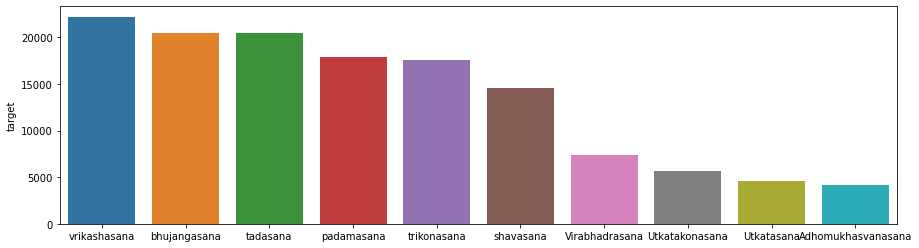

In [33]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=df.target.value_counts().index, y=df.target.value_counts(),ax=ax)